<center>
</center>


#  Обсчёт АБ-теста

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt
from statsmodels.sandbox.stats.multicomp import multipletests 

plt.style.use('ggplot')
%matplotlib inline

COLLAB = False

Давайте представим, что у нас с вами есть сервис, который работает по подписке (онлайн игра, стриминговый сервис, например). Один из важных факторов успешности бизнеса в таком случае - это удержание пользователей, нам надо придумать, как заинтересовать пользователя в продлении подпсики. Возникла идея дать скидку в $1\%$ на продление подписки. Чтобы оценить эффект от этой идеи мы как-то разбили пользователей, которые купили подписку за период теста, на две группы и одним дали скидку на продление, а другим нет.

In [3]:
if COLLAB:
    from google.colab import drive
    drive.mount('/content/gdrive')
    df1 = pd.read_csv('/content/gdrive/MyDrive/DA/6/subscribers_1.csv', sep=',')
else:
    df1 = pd.read_csv('subscribers_1.csv', sep=',')
print(df1.shape)
df1.head()

Mounted at /content/gdrive
(25935, 10)


,user_id,service_id,product_name,product_duration,rn,sale_date,last_duration_days,new_duration_days,is_same,group
0,47233,929,subscription,1_month,1,2018-12-21,30.0,30,1,0
1,50195,929,subscription,1_month,1,2019-03-17,30.0,30,1,1
2,62594,929,subscription,1_month,1,2019-02-08,30.0,30,1,0
3,68918,929,subscription,1_month,2,2019-03-19,30.0,30,1,1
4,91900,929,subscription,3_month,1,2018-10-29,30.0,90,0,0


* `rn` - порядковый номер покупки подписки за период.  
* `last_duration_days` - длительность предыдущей подписки.
* `new_duration_days` - длительность текущей подписки.
* `is_same` - менялась ли длительность подписки.
* `group` - группа теста, в которую попал пользователь. 1 - тест, 0 - контроль.

__а)__ Обсчитайте результаты АБ-теста. Найдите разницу между старой и новой длительностями подписки. Постройте для этой разницы гистограмму. Подумайте и дайте себе ответ на следующие вопросы:

- Можно ли воспользоваться предпосылкой о нормальности распределения приростов и проверить гипотезу тестом Уэлча? 
- Переменная, для которой мы проводим тест имеет дискретное распределение. Можно ли здесь использовать тест Манна-Уитни? Даст ли это коректный результат? 
- Будет ли корректно использовать для проверки гипотезы ЦПТ и тест о равенстве средних, основанный на ней? 

**ОТВЕТ:** 

1) Распределение дискретное, совсем не походит на нормальное. Тест Уэлча неприменим.

2) Выборки являются зависимыми, критерий Манна-Уитни не даст корректный результат

3) ЦПТ работает для слабозависимых величин, в данном случае будет сильная зависимсть.

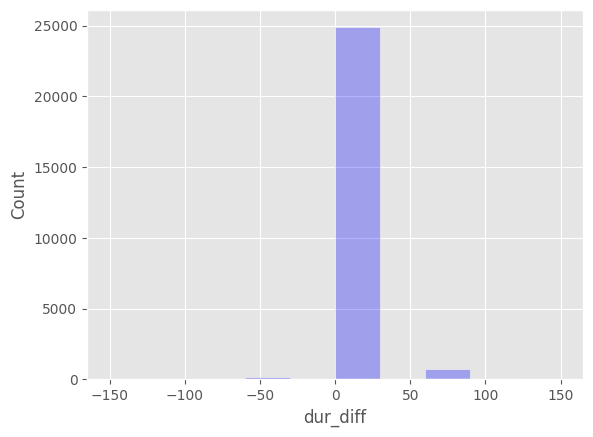

In [4]:
df1['dur_diff'] = df1['new_duration_days'] - df1['last_duration_days']
sns.histplot(df1['dur_diff'], bins=10, alpha=0.3,  color = "blue");

Правда ли, что средняя длительность подписки изменилась на $1\%$ уровне значимости? Для ответа на этот вопрос воспользуйтесь асимптотическим тестом на равенство средних против двусторонней альтернативы. Сохраните в переменную `z_obs` получившееся значение статистики, а в `pvalue` получившееся $p$-значение.

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_1 = \mu_2 \hspace{2mm} \text{Средняя длительность подписки не изменилась} \\
&H_1: \hspace{2mm} \mu_1 \ne \mu_2  \hspace{2mm} \text{Есть изменения}
\end{aligned}
$$

In [7]:
x = df1[df1['group']==0]['dur_diff']
y = df1[df1['group']==1]['dur_diff']
nx, ny = x.size, y.size

diff = x.mean() - y.mean()
diff_std = np.sqrt(x.var(ddof = 1) / nx + y.var(ddof = 1)/ny)

z_obs = diff/ diff_std
pvalue = 2 * (1 - sts.norm.cdf(np.abs(z_obs)))

print("z_obs =", z_obs)
print("pvalue =", pvalue)

z_obs = 0.7476223219884844
pvalue = 0.4546879966908093


___________________
**ОТВЕТ:** На основании полученных данных нет оснований отвергать нулевую гипотезу 
_________________

In [ ]:
# проверка того, что задание решено верно
assert np.abs(z_obs) < 1
assert np.abs(z_obs) > 0.7

# подобные тесты скрыты от вас 


__б)__ А теперь представим, что мы продвинутые АБ-тестеры и решили провести ААБ тест (2 контрольные группы и одну тестовую).

In [9]:
if COLLAB:
    from google.colab import drive
    drive.mount('/content/gdrive')
    df2 = pd.read_csv('/content/gdrive/MyDrive/DA/6/subscribers_2.csv', sep=',')
else:
    df2 = pd.read_csv('subscribers_2.csv', sep=',')
print(df2.shape)
df2.head( )

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(25935, 10)


,user_id,service_id,product_name,product_duration,rn,sale_date,last_duration_days,new_duration_days,is_same,new_group
0,47233,929,subscription,1_month,1,2018-12-21,30.0,30,1,0
1,50195,929,subscription,1_month,1,2019-03-17,30.0,30,1,2
2,62594,929,subscription,1_month,1,2019-02-08,30.0,30,1,0
3,68918,929,subscription,1_month,2,2019-03-19,30.0,30,1,2
4,91900,929,subscription,3_month,1,2018-10-29,30.0,90,0,0


* `new_group` - группа теста, в которую попал пользователь. $2$ - тест, $0,1$ - контроль.

Проверьте гипотезу о том, что в каждой из контрольных групп среднее совпадает с тестовой на уровне значимости $1\%$. Получившиеся $p$-значения запишите в переменные `pval_1` и `pval_2`. Сделайте корректировку методом Холма. Запишите количество отвергнутых гипотез в переменную `hyp_cnt`. 

In [10]:
df2['dur_diff'] = df2['last_duration_days'] - df2['new_duration_days']

x1 = df2[df2['new_group'] == 0]['dur_diff']
x2 = df2[df2['new_group'] == 1]['dur_diff']
y = df2[df2['new_group'] == 2]['dur_diff']

pval = []
for x in [x1, x2]:
    nx, ny = x.size, y.size
    diff = x.mean()- y.mean()
    diff_std = np.sqrt(x.var(ddof=1)/ nx + y.var(ddof=1)/ ny)
    z_obs = diff/ diff_std
    pval.append(2 * (1 - sts.norm.cdf(np.abs(z_obs))))

hyp_cnt = sum(multipletests([pval[0], pval[1]], alpha=0.01, method='holm')[0])

pval_1, pval_2 = pval
print('pval_1 =', pval_1)
print('pval_2 =', pval_2)
print('hyp_cnt =', hyp_cnt)

pval_1 = 0.4466393294905775
pval_2 = 0.33223046480891094
hyp_cnt = 0


In [18]:
print(df2['dur_diff'].mean())

-2.065934065934066


In [11]:
# проверка того, что задание решено верно
assert pval_1 < 0.5
assert pval_1 > 0.4
assert pval_2 > 0.3
assert pval_2 < 0.4

# подобные тесты скрыты от вас 

Какие выводы можно сделать из этого теста?  Валиден ли такой тест?  Если нет, то в чем может быть проблема? Если тут вообще смысл делать поправку Холма?

___________________
**ОТВЕТ:** На основании полученных данных нет оснований отвергать нулевую гипотезу для обоих из контрольных групп, однако среднее значение конечной выборки из фиксированного распределения близко к математическому ожиданию этого распределения по ЗБЧ. Поправка методом Холма имеет смысл при множественной проверке гипотез, здесь мы проверяем всего две гипотезы.
_________________